In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("./dataset.csv", parse_dates=['ScheduledDay', 'AppointmentDay'])



In [3]:
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
y = LabelEncoder().fit_transform(data[["No-show"]])




X = data[["Age", "Scholarship",	"Hipertension",	"Diabetes",	"Alcoholism",	"Handcap",	"SMS_received"]]

#add number of days between scheduled and actual date as a new feature
X['AppointmentTime'] = (data['AppointmentDay']-data['ScheduledDay']).dt.days
X['AppointmentTime'] = X['AppointmentTime'].apply(lambda x: np.maximum(x, 0))

#add a new label indication if the appointmentDay is weekend or not

X['Appointment_on_weekend'] = (data['AppointmentDay'].dt.dayofweek).isin([5, 6]).astype(int)
X.loc[:, 'Weekday'] = data['AppointmentDay'].dt.dayofweek.copy()


#one hot encode gender
X = pd.concat([X, pd.get_dummies(data['Gender']).astype(np.float32)], axis=1)

X['Age']= StandardScaler().fit_transform(X[['Age']])
X.head()

# y = y.reshape((-1, 1))
y = y.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
X_train = X_train.to_numpy()
X_test= X_test.to_numpy()


#NO is encoded as 0, YES as 1 in y

C:\Users\SUDARSHAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SUDARSHAN\AppData\Local\Temp\ipykernel_5104\2725340149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AppointmentTime'] = (data['AppointmentDay']-data['ScheduledDay']).dt.days
C:\Users\SUDARSHAN\AppData\Local\Temp\ipykernel_5104\2725340149.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [5]:
# # y = pd.DataFrame({'NoShow':y})
# z = pd.concat([X, y], axis=1)

# z.to_csv("transformed_dataset.csv", index=False)


In [38]:
from main import Sequential, Dense, Adam, L2Regularizer
model = Sequential([
    Dense(64),#, regularizer=L2Regularizer(0.01)),
    Dense(32),#, regularizer=L2Regularizer(0.01)),
    Dense(16),#, regularizer=L2Regularizer(0.001)),
    Dense(16), 
    Dense(8),#, regularizer=L2Regularizer(0.001)),
    Dense(8),
    Dense(1, activation='sigmoid')
])

In [39]:
model.compile(loss='binary_cross_entropy', optimizer=Adam(model, learning_rate=1e-3))
model.build(X.shape[1])

In [40]:
y_pred = model.predict(X_test)
from main import accuracy
accuracy(y_pred>=0.5, y_test)


np.float64(0.26617207997828646)

In [52]:

(train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X_train, y_train, epochs=15, batch_size=256, X_test=X_test, y_test=y_test)

Epoch: 1, time taken: 0.48267698287963867, accuracy=0.7973096416784536, binary_cross_entropy loss=0.4526214330269436
Epoch: 2, time taken: 0.4382789134979248, accuracy=0.7971715140264026, binary_cross_entropy loss=0.4526831775558783
Epoch: 3, time taken: 0.4330768585205078, accuracy=0.7973096416784536, binary_cross_entropy loss=0.4522287747835545
Epoch: 4, time taken: 0.41196298599243164, accuracy=0.7975398544318717, binary_cross_entropy loss=0.4516862317338233
Epoch: 5, time taken: 0.427990198135376, accuracy=0.7971715140264026, binary_cross_entropy loss=0.45180918920004204
Epoch: 6, time taken: 0.42613768577575684, accuracy=0.7972175565770863, binary_cross_entropy loss=0.45170393860858243
Epoch: 7, time taken: 0.4396069049835205, accuracy=0.7974477693305045, binary_cross_entropy loss=0.45099244198336147
Epoch: 8, time taken: 0.40621161460876465, accuracy=0.7971715140264026, binary_cross_entropy loss=0.45176316075952644
Epoch: 9, time taken: 0.4339303970336914, accuracy=0.797125471475

In [42]:
# model.optimizer.learning_rate=1e-5
# (train_loss, train_accuracy), (test_loss, test_accuracy) = model.fit(X_train_true, np.ones((X_train_true.shape[0], 1)), epochs=1, batch_size=1024, X_test=X_test, y_test=y_test)

In [43]:
# model.fit(X_train, y_train, epochs=500, learning_rate=1e-2)
# plt.plot(train_loss)
# plt.plot(train_accuracy)

In [44]:
# plt.plot(test_loss)
# plt.plot(test_accuracy)

In [45]:
y_pred = model.predict(X_test)

In [46]:
from main import accuracy, calculate_f1, calculate_precision, calculate_recall
accuracy(y_pred>=0.5, y_test)

np.float64(0.7998733375554148)

In [47]:
f1_score(y_test, y_pred>=0.365, average='weighted')

0.7493220585212356

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve


In [53]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)


In [54]:
f1 = 2*precision*recall/(precision+recall+1e-9)

In [57]:
# plt.plot(thresholds, f1[:-1])
print(np.max(f1))

np.argmax(f1)
# thresholds[5826]


0.4390286432649334


np.int64(5619)

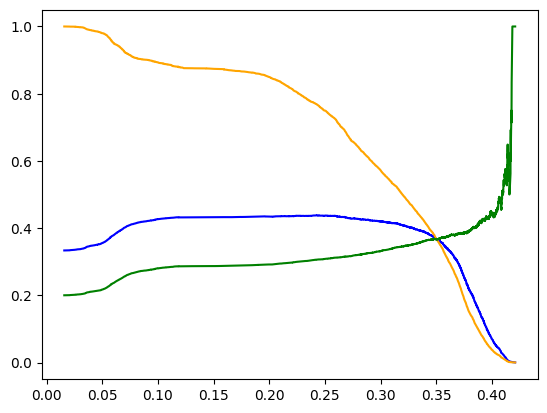

In [34]:
# plt.plot(f1,'b')
# plt.plot(recall, 'orange')
# plt.plot(precision, 'g')

plt.plot(thresholds, f1[:-1],'b')
plt.plot(thresholds,recall[:-1], 'orange')
plt.plot(thresholds,precision[:-1], 'g')
# plt.plot([0, 0.5], [0.447, 0.447], 'r')

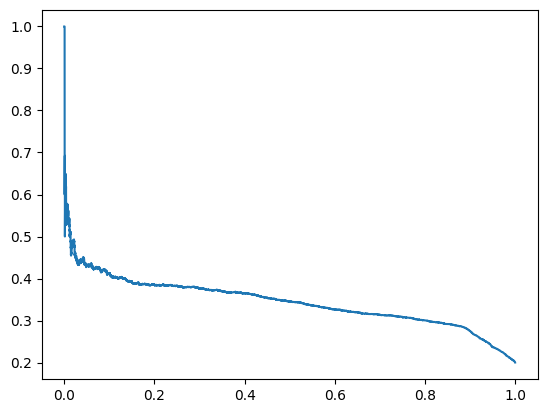

In [35]:
plt.plot(recall, precision)

In [36]:
from sklearn.metrics import auc
auc(recall, precision)

np.float64(0.34480490617380255)

In [ ]:
import psutil
psutil.virtual_memory().used

In [37]:
### THIS PART OF CODE WAS GENERATED USING GEMINI

import psutil
import os

# Get the current process
process = psutil.Process(os.getpid())

# Get memory info for this specific process
# .rss (Resident Set Size) is often a good measure for actual physical RAM used by the process.
# .vms (Virtual Memory Size) is the total virtual address space, can be much larger.
mem_info = process.memory_info()
rss_bytes = mem_info.rss
vms_bytes = mem_info.vms

print(f"Current script - RSS: {rss_bytes / (1024 * 1024):.2f} MB") # Resident Set Size
print(f"Current script - VMS: {vms_bytes / (1024 * 1024):.2f} MB") # Virtual Memory Size

# For total system usage (what you were using before)
total_system_used_bytes = psutil.virtual_memory().used
print(f"Total system RAM used: {total_system_used_bytes / (1024 * 1024 * 1024):.2f} GB")

Current script - RSS: 319.07 MB
Current script - VMS: 1287.30 MB
Total system RAM used: 13.78 GB
